In [143]:
#name:Bochen Wang
#perm:8344863
import pandas as pd
import numpy as np
abalone = pd.read_csv('data/abalone.csv')

In [144]:
abalone['age'] = abalone.rings + 1.5

In [145]:
abalone.head()

,type,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [146]:
abalone.isna().sum()#check if there is any missing value

type              0
longest_shell     0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age               0
dtype: int64

In [147]:
abalone.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4177 entries, 0 to 4176
Series name: age
Non-Null Count  Dtype  
--------------  -----  
4177 non-null   float64
dtypes: float64(1)
memory usage: 32.8 KB


<AxesSubplot: >

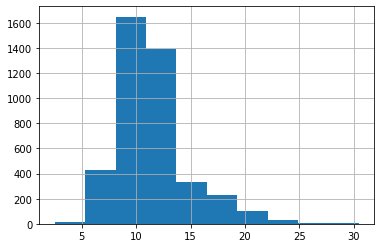

In [148]:
abalone.age.hist()

In [149]:
#1
# we can see from the above the mean is 11.43 and have standard distribution of 3.22. 
# we also have 4177 samples that we can learn
# the data is skewed to the right so that the population need further investigation


In [150]:
#2
from sklearn.model_selection import train_test_split
aba_noring = abalone.drop(columns = ['rings'])#remove the rings column for further uses
aba_train_x, aba_test_x,aba_train_y, aba_test_y = train_test_split(aba_noring.drop(columns=['age']),
                                                                   aba_noring.age,
                                                                   test_size = 0.2,
                                                                   random_state = 250,
                                                                   stratify=aba_noring.type)
#this function already have the inbuild function of setting the seed at random_state
#using type to stratify and split the data in to 8:2 proportion
#we can see from the information below that test and training set have been splited.

In [151]:
aba_train_x.describe()

,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.523837,0.407811,0.139645,0.829904,0.360208,0.181132,0.238893
std,0.121009,0.099951,0.042768,0.492156,0.222861,0.110358,0.139752
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.345000,0.115000,0.441000,0.186000,0.092500,0.130000
50%,0.545000,0.425000,0.140000,0.803500,0.338500,0.171000,0.235000
75%,0.615000,0.480000,0.165000,1.160000,0.506500,0.254000,0.330000
max,0.815000,0.650000,1.130000,2.825500,1.351000,0.760000,1.005000


In [152]:
aba_train_y.describe()

count    3341.000000
mean       11.401227
std         3.204852
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        28.500000
Name: age, dtype: float64

In [65]:
#3 ,4 and 5
#I have excluded the rings variable. 
#Because that age is dependent on the rings that poses a question of colinearity. age=rings+1.5

#python have a differ workflow than R so I used different approches here
#Scikit-learn’s “pipelines” serve the combined purpose of “workflows” and “recipes” in {tidymodels}. 
#They allow you to define a set of preprocessing and modeling steps that you can then apply to any dataset. 
#They are defined by the function make_pipeline(), with the steps, in order, as arguments.

In [167]:
from sklearn.base import TransformerMixin#used for feature engineering
from sklearn.pipeline import Pipeline#include the pipeline
from sklearn.preprocessing import StandardScaler#used for standardizing
from sklearn.linear_model import LinearRegression#the model selection

class CustomTransformer(TransformerMixin):#this class I copied from the sklearn website to do feature engineering
    def fit(self, X, y=None):
        """The fit method doesn't do much here, 
           but it still required if your pipeline
           ever need to be fit. Just returns self."""
        return self

    def transform(self, X, y=None):
        """This is where the actual transformation occurs.
           Assuming you want to compute the product of your feature
           height and area.
        """
        # Copy X to avoid mutating the original dataset
        X_ = X.copy()
        # change new_feature and right member according to your needs
        #X_["new_feature"] = X_["height"] * X_["area"]
        
        #X_ = pd.get_dummies(X_, columns=['type']) I decided to exclude this because this code only generate with exsiting categories
        #so it is not useful for single prediction
        #so I include this as a general rule for dummy encoding
        values=[1,0]
        conditionsF=[(X_['type']=='F'),(X_['type']!='F')]
        X_['type_F']=np.select(conditionsF,values)
        conditionsI=[(X_['type']=='I'),(X_['type']!='I')]
        X_['type_I']=np.select(conditionsI,values)
        conditionsM=[(X_['type']=='M'),(X_['type']!='M')]
        X_['type_M']=np.select(conditionsM,values)
        X_ = X_.drop(columns=['type'])
        
        #these are the interaction varibles
        X_['type_F' +'*'+'shucked_weight'] = X_['type_F'] * X_['shucked_weight']
        X_['type_I' +'*'+'shucked_weight'] = X_['type_I'] * X_['shucked_weight']
        X_['type_M' +'*'+'shucked_weight'] = X_['type_M'] * X_['shucked_weight']
        X_['longest_shell' +'*'+'diameter'] = X_['longest_shell'] * X_['diameter']
        X_['shell_weight' +'*'+'shucked_weight'] = X_['shell_weight'] * X_['shucked_weight']
        # you then return the newly transformed dataset. It will be 
        # passed to the next step of your pipeline
        return X_
custom = CustomTransformer()

lr_pipe = Pipeline([('feature_engineering', custom),
                    ('scl', StandardScaler()),
                    ('clf',LinearRegression())])#using pipeline to standardize the varibles

lm = lr_pipe.fit(aba_train_x, aba_train_y)


In [169]:
#in order to make this clearer I included the diagram for this pipeline as in the function of sklearn
from sklearn import set_config

set_config(display='diagram')
display(lm)

Pipeline(steps=[('feature_engineering',
                 <__main__.CustomTransformer object at 0x0000014FC9EC4CD0>),
                ('scl', StandardScaler()), ('clf', LinearRegression())])

In [170]:
#6 using the model for specific predictions
#create a DataFrame
d_new = {'type':['F'], 'longest_shell':[0.50],
         'diameter':[0.10],'height':[0.30],
         'whole_weight':[4],'shucked_weight':[1],
         'viscera_weight':[2],'shell_weight':[1]}
hypo_F = pd.DataFrame(data = d_new)

In [171]:
hypo_F

,type,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,F,0.5,0.1,0.3,4,1,2,1


In [172]:
lm.predict(hypo_F)

array([25.0320658])

In [175]:
#7
lm_pred_tbl = pd.DataFrame(#create the data frame by the test results
{"true": aba_test_y,
"pred": lm.predict(aba_test_x)})
lm_pred_tbl

,true,pred
1669,11.5,11.703001
4135,12.5,13.764627
3718,8.5,9.320869
1340,10.5,10.869176
1952,11.5,11.832726
...,...,...
628,22.5,12.836685
1458,8.5,9.678178
1973,11.5,12.429232
1195,10.5,9.551909


In [176]:
from sklearn.metrics import r2_score#check R^2 score 
cr_r2 =r2_score(
y_true = lm_pred_tbl.true, 
y_pred = lm_pred_tbl.pred)

from sklearn.metrics import mean_squared_error#check rmse
cr_rmse = mean_squared_error(
y_true = lm_pred_tbl.true, 
y_pred = lm_pred_tbl.pred, squared=False)

from sklearn.metrics import mean_absolute_error#check mae
cr_mae =mean_absolute_error(
y_true = lm_pred_tbl.true, 
y_pred = lm_pred_tbl.pred)

#since R package yardstick and python have its difference so I will provide a dataframe containing the scores.
d = {'metric':['R^2','RMSE','MAE'],'estimate':[cr_r2,cr_rmse,cr_mae]}
df = pd.DataFrame(data=d)
df

,metric,estimate
0,R^2,0.563932
1,RMSE,2.177206
2,MAE,1.533275


In [177]:
#for R^2 is 0.564 means that approximately half of the observed variation can be explained by the model's inputs.